In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reduced_grant_set = pd.read_csv('reducedSet.csv')
reduced_grant_set.shape
testing_set = pd.read_csv('testing.csv')
testing_set.shape
training_set = pd.read_csv('training.csv')
training_set.shape

(8190, 1882)

In [4]:
selected_predictors = reduced_grant_set.iloc[:, 0].tolist()
x_train = training_set[selected_predictors]
y_train = training_set['Class']
x_test = testing_set[selected_predictors]
y_test = testing_set['Class']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8190, 252), (8190,), (518, 252), (518,))

In [5]:
#Padronizar os dados -> dados padronizados no knn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
Melhores parâmetros NN: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}


C:\Users\paulo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.861003861003861

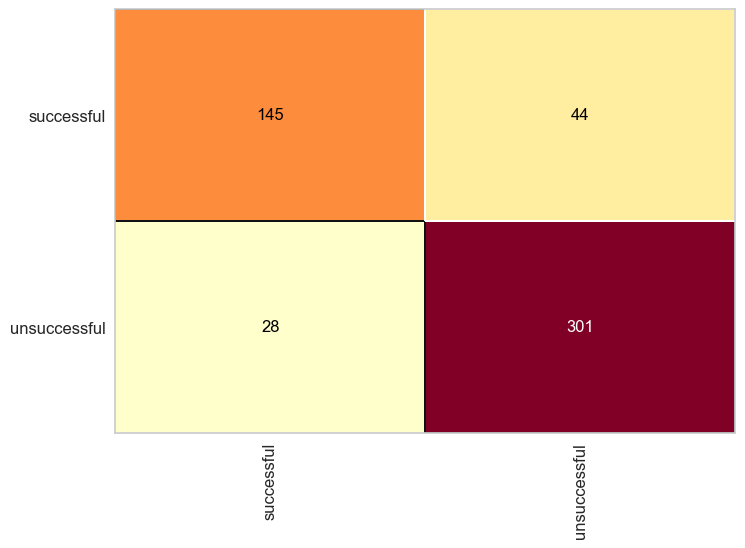

In [6]:
#Cross Validation para rede neural
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parameters_mlp = {
    'hidden_layer_sizes': [(100,), (127,127), (50, 50, 50)],
    'alpha':[0.0001, 0.001]
}

grid_mlp = GridSearchCV(MLPClassifier(max_iter=500), parameters_mlp, cv=4, scoring='accuracy', verbose= True)
grid_mlp.fit(x_train, y_train)
print(f"Melhores parâmetros NN: {grid_mlp.best_params_}")
best_nn = grid_mlp.best_estimator_

from sklearn.metrics import accuracy_score
best_predictions = best_nn.predict(x_test)
accuracy_score(best_predictions, y_test)

from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(best_nn)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

Fitting 4 folds for each of 28 candidates, totalling 112 fits
Melhores parâmetros reais: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'uniform'}


0.7722007722007722

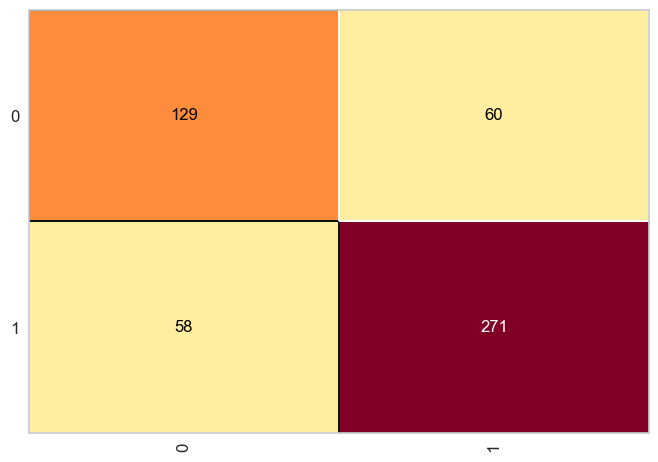

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

# 1. Transformar 'successful'/'unsuccessful' em 0 e 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance'],      
    'metric': ['euclidean', 'manhattan']    
}

grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=param_grid_knn, 
    cv=4, 
    scoring='accuracy', 
    verbose=1
)

grid_knn.fit(x_train_scaled, y_train_encoded) 

print(f"Melhores parâmetros reais: {grid_knn.best_params_}")
best_knn = grid_knn.best_estimator_

knn_predictions = best_knn.predict(x_test_scaled)
accuracy_score(y_test_encoded, knn_predictions)

cm_knn = ConfusionMatrix(best_knn)
cm_knn.fit(x_train_scaled, y_train_encoded)
cm_knn.score(x_test_scaled, y_test_encoded)